In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('iris-data.csv')
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:, :-1]
y = df['Species'].values

sc = StandardScaler()
x_std = sc.fit_transform(x)
print(x_std[:10])

# le = LabelEncoder()
# y = le.fit_transform(y)
print(y[:10])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


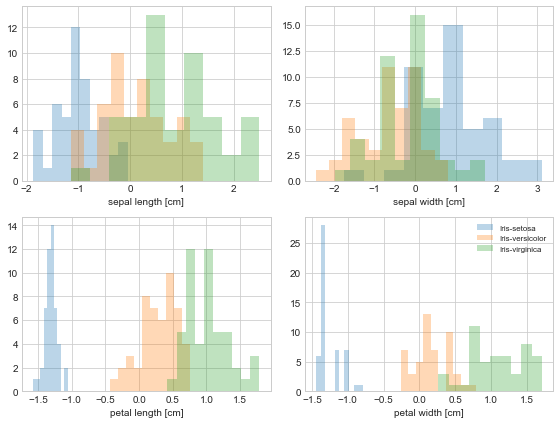

In [4]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(x_std[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [5]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [6]:
print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
%%time
cov_mat = np.cov(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
CPU times: user 2.61 ms, sys: 1.05 ms, total: 3.66 ms
Wall time: 1.26 ms


In [8]:
%%time
cor_mat1 = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]
CPU times: user 3.09 ms, sys: 1.41 ms, total: 4.5 ms
Wall time: 1.52 ms


In [9]:
%%time
cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]
CPU times: user 2.77 ms, sys: 1.11 ms, total: 3.88 ms
Wall time: 2.16 ms


In [10]:
%%time
u,s,v = np.linalg.svd(x_std.T)
print(u)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
CPU times: user 2.71 ms, sys: 1.62 ms, total: 4.33 ms
Wall time: 1.06 ms


In [11]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072254
0.1473532783050958
0.020607707235624842


In [13]:
tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

3.9999999999999987
[72.77045209380134, 23.030523267680643, 3.683831957627396, 0.5151926808906212]
[ 72.77045209  95.80097536  99.48480732 100.        ]


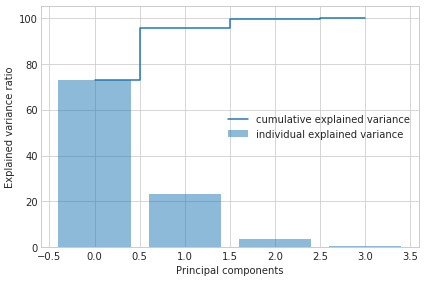

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [15]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [16]:
Y = x_std.dot(matrix_w)
print(Y)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

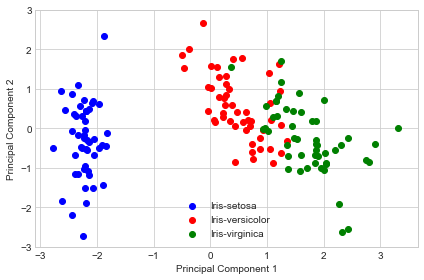

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [18]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
y_sklearn = sklearn_pca.fit_transform(x_std)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


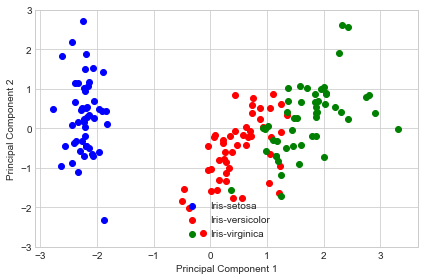

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(y_sklearn[y==lab, 0],
                    y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Explained variance:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Cummulative variance:
 [2.93035378 3.8577574  4.00609962 4.02684564]


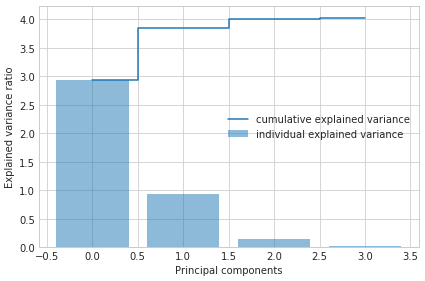

In [20]:
sklearn_pca = sklearnPCA(n_components=4)
sklearn_pca.fit_transform(x_std)

var_exp = sklearn_pca.explained_variance_
print('Explained variance:\n', var_exp)
cum_var_exp = np.cumsum(var_exp)
print('Cummulative variance:\n', cum_var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [26]:
from xgboost import XGBClassifier

x = df.iloc[:, :-1].values
y = df['Species'].values

sc = StandardScaler()
x_std = sc.fit_transform(x)

le = LabelEncoder()
y = le.fit_transform(y)

mat = []

for ncomp in range(1,5):
    pca = sklearnPCA(n_components=ncomp)
    x_trans = pca.fit_transform(x_std)
#     print(x_std)
#     print(x_trans)
    x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 3)
#     print([ncomp, accuracy])
    mat.append([ncomp, accuracy])

data = pd.DataFrame(mat, columns=['No. of components', 'Accuracy (of XGBoost)'])
data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,No. of components,Accuracy (of XGBoost)
0,1,0.933
1,2,0.867
2,3,0.956
3,4,0.933


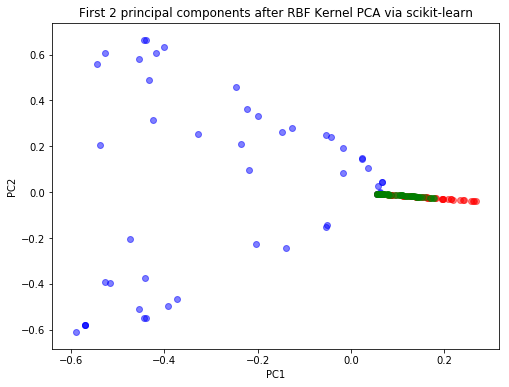

In [37]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
x_trans = kpca.fit_transform(x_std)

plt.figure(figsize=(8,6))
plt.scatter(x_trans[y==0, 0], x_trans[y==0, 1], color='blue', alpha=0.5)
plt.scatter(x_trans[y==1, 0], x_trans[y==1, 1], color='red', alpha=0.5)
plt.scatter(x_trans[y==2, 0], x_trans[y==2, 1], color='green', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [47]:
mat = []

for ncomp in range(1,5):
    x = []
    for gamma in range(1, 10):
        kpca = KernelPCA(n_components=ncomp, kernel='rbf', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in range(1,10)]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Gamma:1,Gamma:2,Gamma:3,Gamma:4,Gamma:5,Gamma:6,Gamma:7,Gamma:8,Gamma:9
No. of components,,,,,,,,,
1,0.600,0.689,0.711,0.667,0.689,0.489,0.578,0.667,0.622
2,0.867,0.911,0.889,0.644,0.778,0.689,0.667,0.733,0.733
3,0.933,0.933,0.867,0.822,0.844,0.844,0.711,0.756,0.756
4,0.956,0.933,0.889,0.867,0.800,0.822,0.778,0.867,0.733


In [48]:
mat = []

for ncomp in range(1,5):
    x = []
    for gamma in range(1, 10):
        kpca = KernelPCA(n_components=ncomp, kernel='sigmoid', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in range(1,10)]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:2,Gamma:3,Gamma:4,Gamma:5,Gamma:6,Gamma:7,Gamma:8,Gamma:9
No. of components,,,,,,,,,
1,0.911,0.889,0.756,0.756,0.733,0.756,0.778,0.778,0.800
2,0.911,0.911,0.733,0.733,0.756,0.756,0.756,0.756,0.778
3,0.911,0.911,0.756,0.800,0.800,0.733,0.778,0.711,0.778
4,0.978,0.911,0.778,0.822,0.800,0.800,0.778,0.756,0.800


In [49]:
mat = []

for ncomp in range(1,5):
    x = []
    for gamma in range(1, 10):
        kpca = KernelPCA(n_components=ncomp, kernel='poly', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in range(1,10)]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:2,Gamma:3,Gamma:4,Gamma:5,Gamma:6,Gamma:7,Gamma:8,Gamma:9
No. of components,,,,,,,,,
1,0.756,0.889,0.844,0.822,0.822,0.800,0.800,0.822,0.800
2,0.889,0.889,0.889,0.889,0.889,0.889,0.889,0.889,0.889
3,0.844,0.889,0.889,0.889,0.889,0.889,0.889,0.889,0.889
4,0.844,0.889,0.867,0.867,0.911,0.911,0.889,0.889,0.889


In [50]:
mat = []

for ncomp in range(1,5):
    x = []
    for gamma in range(1, 10):
        kpca = KernelPCA(n_components=ncomp, kernel='cosine', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in range(1,10)]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:2,Gamma:3,Gamma:4,Gamma:5,Gamma:6,Gamma:7,Gamma:8,Gamma:9
No. of components,,,,,,,,,
1,0.778,0.778,0.778,0.778,0.778,0.778,0.778,0.778,0.778
2,0.756,0.756,0.756,0.756,0.756,0.756,0.756,0.756,0.756
3,0.844,0.844,0.844,0.844,0.844,0.844,0.844,0.844,0.844
4,0.844,0.844,0.844,0.844,0.844,0.844,0.844,0.844,0.844
